# Advanced Data Analysis - week 10 - scikit-learn 
In the advanced data analysis course, we assume basic knowledge of Python, as could be acquired by attending the *Introduction to Programming* bridging course.

This notebook includes the examples presented in **Week 10** lecture and a set of exercises related with clustering using scikit-learn. There is a version of this notebook using Spark Mlib.


## Initialization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



## Example: cluster-data.txt

Load file cluster-data.txt.


### Load and print

Loads data and displays the data.


          x      y
0     54620  43523
1     52694  42750
2     53253  43024
3     54925  42624
4     54973  43980
...     ...    ...
2995   8754  61242
2996  11165  59822
2997   8828  59102
2998   8879  59244
2999  10002  61399

[3000 rows x 2 columns]


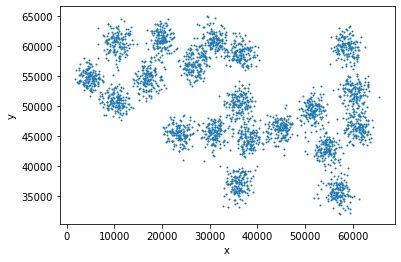

In [2]:
fileName = os.path.join( os.path.join( "data", "clustering"), "cluster-data.txt")

dataset = pd.read_csv(fileName)

dataset.plot.scatter(x="x",y="y",s=1)

print(dataset)


### K-means cluster

Loads data, train K-means and display the centroids.


In [3]:
fileName = os.path.join( os.path.join( "data", "clustering"), "cluster-data.txt")

dataset = pd.read_csv(fileName)

# Initialize the algorithm for 20 cluster
# setSeed to a constant allows to repeat the computation and generate exactly the same clusters
kmeans = KMeans(n_clusters = 20, n_init='auto', random_state=1)

# Generate a model from the dataset
kmeans.fit(dataset)

# Shows the result.
print("Cluster Centers: ")
print(kmeans.cluster_centers_)
    

Cluster Centers: 
[[23495.15540541 45438.83783784]
 [51573.67320261 49327.29411765]
 [36948.14855072 47837.20652174]
 [10325.34210526 50846.02631579]
 [32269.025      60541.5       ]
 [60331.40397351 52416.39735099]
 [56813.5704698  35697.3557047 ]
 [44515.42592593 46178.61728395]
 [36021.13664596 37417.71428571]
 [19903.18       61170.26666667]
 [10595.53333333 60619.72      ]
 [26702.39041096 56761.48630137]
 [ 4804.08108108 54722.59459459]
 [60959.31543624 46441.02684564]
 [58641.16       59852.84      ]
 [54461.22972973 42821.51351351]
 [30860.41891892 45598.86486486]
 [36645.95070423 58524.8028169 ]
 [29379.01149425 60970.26436782]
 [17043.57333333 54549.93333333]]


With the K-means model, we can now assign each point to a cluster.

<AxesSubplot: xlabel='x', ylabel='y'>

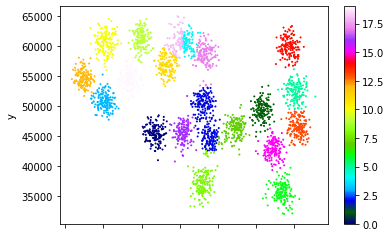

In [4]:
# Assign each element of the data set to a cluster number
labels = kmeans.predict(dataset)

# Display results, using the cluster number as the color
dataset.plot.scatter(x="x",y="y",c=labels,s=1,cmap='gist_ncar')


We can compute the quality of the clustering using the Silhouette as follows. 
**NOTE:** The score is different from the one returned with Spark mlib because Spark uses squared Euclidean distance and scikit learn use Euclidean distance.

In [5]:
# Evaluate the quality of the prediction
score = silhouette_score(dataset, labels)

print( "Quality of predictions (higher is better):" + str(score))


Quality of predictions (higher is better):0.5577664639129881


### Finding out the number of cluster

For finding out the "best" number of clusters, compute K-means for the value of K from 2 to 40, and plot the Silhouette value. The maximum value is the clustering with best quality.

<AxesSubplot: xlabel='num'>

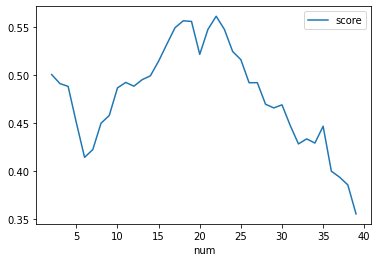

In [6]:
# Function to perform clustering of dataset data with K clusters, 
# returning the Silhouette score
def evaluate( dataset, k):
    kmeans = KMeans(n_clusters = k, n_init='auto')
    labels = kmeans.fit_predict(dataset)
    score = silhouette_score(dataset, labels)
    return score


fileName = os.path.join( os.path.join( "data", "clustering"), "cluster-data.txt")

dataset = pd.read_csv(fileName)

# For each value from 2 to 40 compute the clusters and the score
df = pd.DataFrame(columns=['num','score'])
for i in range(2,40):
    df = pd.concat([df,pd.Series({"num": i, "score": evaluate(dataset,i)}).to_frame().T], ignore_index=True)

# Plot the scores    
df.plot( x="num", y="score")



Let's print the clustering that leads to a better result.

<AxesSubplot: xlabel='x', ylabel='y'>

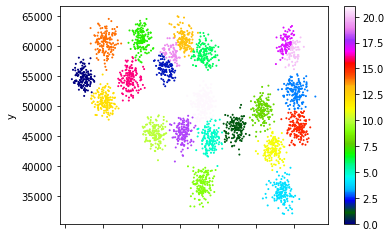

In [7]:
k = int(df.nlargest(1,"score")["num"].values[0])

kmeans = KMeans(n_clusters = k, n_init='auto')
labels = kmeans.fit_predict(dataset)

# Display results, using the cluster number as the color
dataset.plot.scatter(x="x",y="y",c=labels,s=1,cmap='gist_ncar')


## Exercise

For data points for which the value of y is larger than 40000, find out the appropriate number of clusters and present the resulting cluster.